In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        global boxes, i
        i+=1
        print ('Point' + str(i) + ' Position: ' + str(x) + ', ' + str(y))
        s_box = [x, y]
        boxes.append(s_box)
        if(i==3):
            cv2.destroyAllWindows()

In [30]:
boxes = []
i = 0
img = cv2.imread("Color_MRI.png", 0)
resized = cv2.resize(img,(512,512))
cv2.namedWindow('input')
cv2.setMouseCallback('input', on_mouse, 0,)
cv2.imshow('input', resized)
cv2.waitKey()

Point1 Position: 250, 103
Point2 Position: 295, 421
Point3 Position: 234, 426


-1

In [31]:
main_boxes = boxes
boxes = []
i = 0
img = cv2.imread("Color_MRI2.png", 0)
resized = cv2.resize(img,(512,512))
cv2.namedWindow('input')
cv2.setMouseCallback('input', on_mouse, 0,)
cv2.imshow('input', resized)
cv2.waitKey()

Point1 Position: 127, 98
Point2 Position: 382, 367
Point3 Position: 347, 412


-1

In [32]:
new_boxes = boxes

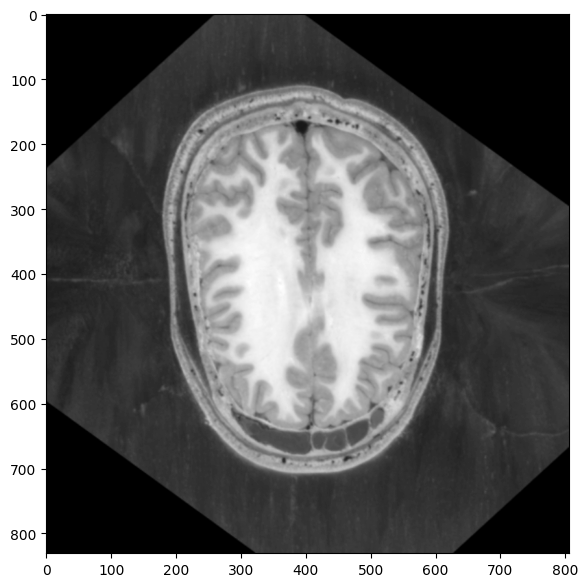

In [41]:
M = cv2.getAffineTransform(np.array(new_boxes, dtype=np.float32), np.array(main_boxes, dtype=np.float32))
rows,cols = resized.shape
dst = cv2.warpAffine(resized,M,(cols,rows))
dst = cv2.resize(dst,img.shape)
plt.figure(figsize=(7,7))
plt.imshow(dst, cmap="gray")
plt.show()

In [39]:
def jointhist(img1,img2):  
        fig, ax = plt.subplots(figsize =(10, 7))
        # Creating plot
        plt.hist2d(img1.ravel(), img2.ravel(), bins =[20, 20], cmap = plt.cm.nipy_spectral)
        plt.title("Changing the color scale and adding color bar")
        
        # Adding color bar
        plt.colorbar()
        
        ax.set_xlabel('X-axis') 
        ax.set_ylabel('X-axis') 
        
        # show plot
        plt.tight_layout() 
        plt.show()

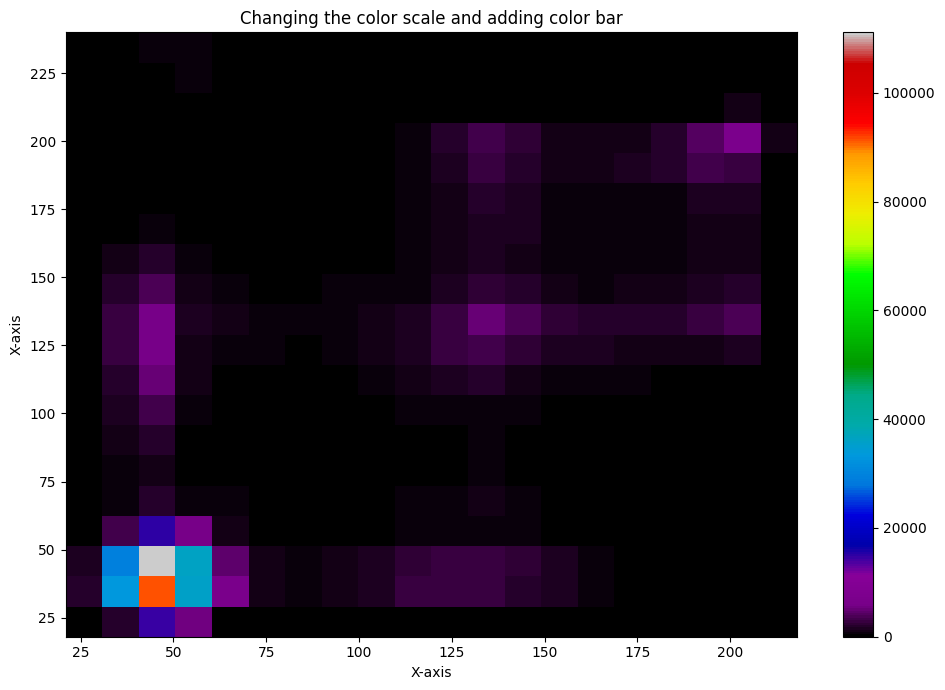

In [40]:
image1 = cv2.imread("Color_MRI.png", 0)
image2 = cv2.imread("Color_MRI2.png", 0)
jointhist(image1,image2)

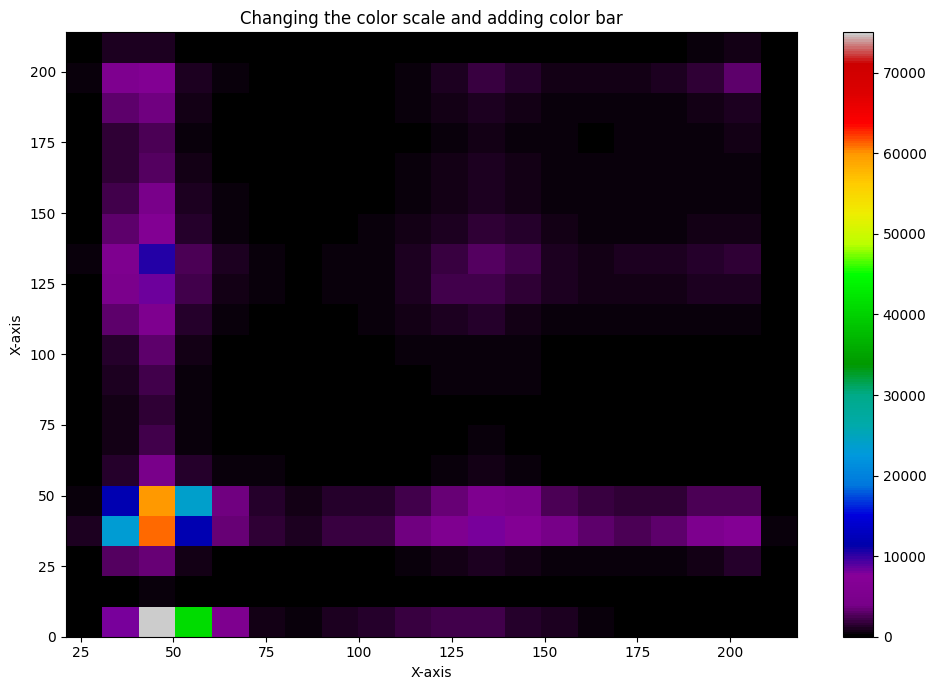

In [42]:
jointhist(image1, dst)

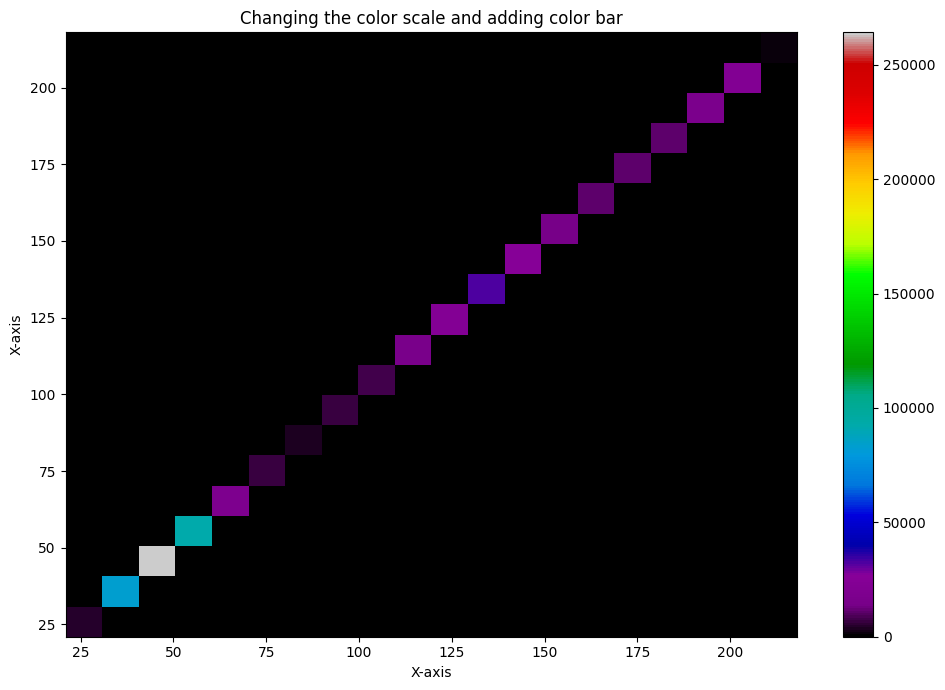

In [43]:
jointhist(image1, image1)